In [26]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd

%matplotlib inline

In [27]:
df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')

/tmp/ipykernel_6953/3243065608.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/fr.openfoodfacts.org.products.csv', sep='\t')


In [28]:
df.shape

(320772, 162)

In [29]:
df.iloc[:,:59].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   code                                        320749 non-null  object 
 1   url                                         320749 non-null  object 
 2   creator                                     320770 non-null  object 
 3   created_t                                   320769 non-null  object 
 4   created_datetime                            320763 non-null  object 
 5   last_modified_t                             320772 non-null  object 
 6   last_modified_datetime                      320772 non-null  object 
 7   product_name                                303010 non-null  object 
 8   generic_name                                52795 non-null   object 
 9   quantity                                    104819 non-null  object 
 

In [30]:
df.iloc[:, df.columns.tolist().index('code'): df.columns.tolist().index('packaging')]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g


In [31]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
76156,71476002089,http://world-fr.openfoodfacts.org/produit/0071...,usda-ndb-import,1489136728,2017-03-10T09:05:28Z,1489136728,2017-03-10T09:05:28Z,Hot Dog Buns,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN
211616,3256225434916,http://world-fr.openfoodfacts.org/produit/3256...,openfoodfacts-contributors,1487235260,2017-02-16T08:54:20Z,1488705844,2017-03-05T09:24:04Z,Miel crémeux de citronnier doux,NaN,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
280650,5470227031715,http://world-fr.openfoodfacts.org/produit/5470...,tacite,1468667300,2016-07-16T11:08:20Z,1474044714,2016-09-16T16:51:54Z,Saucisson de cheval rouge fumé féculé,NaN,3 * 300 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293837,7613269302858,http://world-fr.openfoodfacts.org/produit/7613...,openfood-ch-import,1486506513,2017-02-07T22:28:33Z,1487257043,2017-02-16T14:57:23Z,Paella sans riz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
116133,492180200705,http://world-fr.openfoodfacts.org/produit/0492...,usda-ndb-import,1489140544,2017-03-10T10:09:04Z,1489140544,2017-03-10T10:09:04Z,Mini Bundt Cakes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN
42440,41268200603,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489078505,2017-03-09T16:55:05Z,1489078505,2017-03-09T16:55:05Z,Sweet & Crispy Graham Crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
80571,72400007200,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489062604,2017-03-09T12:30:04Z,1489062604,2017-03-09T12:30:04Z,Spreadable Fruit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10448,12345678912,http://world-fr.openfoodfacts.org/produit/0012...,openfoodfacts-contributors,1445069036,2015-10-17T08:03:56Z,1445069036,2015-10-17T08:03:56Z,led,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250119,3700279301477,http://world-fr.openfoodfacts.org/produit/3700...,hommedanslalune,1361997915,2013-02-27T20:45:15Z,1466970305,2016-06-26T19:45:05Z,La Crème Dessert à la Vanille,Crème dessert à la vanille,570 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232835,3435569920020,http://world-fr.openfoodfacts.org/produit/3435...,laurent75005,1446136709,2015-10-29T16:38:29Z,1446136789,2015-10-29T16:39:49Z,Moutarde violette au mout de raisin,NaN,200g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_gen = df.iloc[:, df.columns.tolist().index('code'):
                    df.columns.tolist().index('packaging')]
df_tags = df.iloc[:, df.columns.tolist().index('packaging'):
                     df.columns.tolist().index('ingredients_text')]
df_ingredients = df.iloc[:, df.columns.tolist().index('ingredients_text'):
                            df.columns.tolist().index('serving_size')]
df_misc = df.iloc[:, df.columns.tolist().index('serving_size'):
                     df.columns.tolist().index('energy_100g')]
df_nutrition = df.iloc[:, df.columns.tolist().index('energy_100g'):]

In [46]:
df_gen.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
78826,72036951847,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489059290,2017-03-09T11:34:50Z,1489059290,2017-03-09T11:34:50Z,"Ffesh Foods Market, 3-Cheese Blend, Shredded A...",NaN,NaN
205076,3250390011538,http://world-fr.openfoodfacts.org/produit/3250...,kiliweb,1490009398,2017-03-20T11:29:58Z,1490009398,2017-03-20T11:29:58Z,Print 0%0% Yt Fruits,NaN,NaN
37351,41000358449,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489055325,2017-03-09T10:28:45Z,1489055326,2017-03-09T10:28:46Z,"Dressing & Seasoning Mix, Honey, Mustard",NaN,NaN
78767,72036781543,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489059694,2017-03-09T11:41:34Z,1489059694,2017-03-09T11:41:34Z,"Inc., Basmati Brown & Wild Rice Blend",NaN,NaN
273872,5053947026690,http://world-fr.openfoodfacts.org/produit/5053...,bcatelin,1392843191,2014-02-19T20:53:11Z,1415752586,2014-11-12T00:36:26Z,Ardennes pâté,pâté,160g
79282,72101011490,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489061894,2017-03-09T12:18:14Z,1489061894,2017-03-09T12:18:14Z,"Supreme Salsa, Mild",NaN,NaN
311764,8480017106780,http://world-fr.openfoodfacts.org/produit/8480...,javichu,1375975467,2013-08-08T15:24:27Z,1406321672,2014-07-25T20:54:32Z,Tomate frito &quot;Dia&quot;,Tomate frito,390 g
205060,3250390010258,http://world-fr.openfoodfacts.org/produit/3250...,openfoodfacts-contributors,1423731779,2015-02-12T09:02:59Z,1458123590,2016-03-16T10:19:50Z,Fromage râpé,"Fromage industriel de France, à pâte pressée c...",200 g
1809,11110011541,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489070177,2017-03-09T14:36:17Z,1489070177,2017-03-09T14:36:17Z,"Soda, Vanilla Cream",NaN,NaN
77350,71730007164,http://world-fr.openfoodfacts.org/produit/0071...,usda-ndb-import,1489065216,2017-03-09T13:13:36Z,1489065216,2017-03-09T13:13:36Z,"No Yolks, Enriched Egg White Pasta, Broad",NaN,NaN


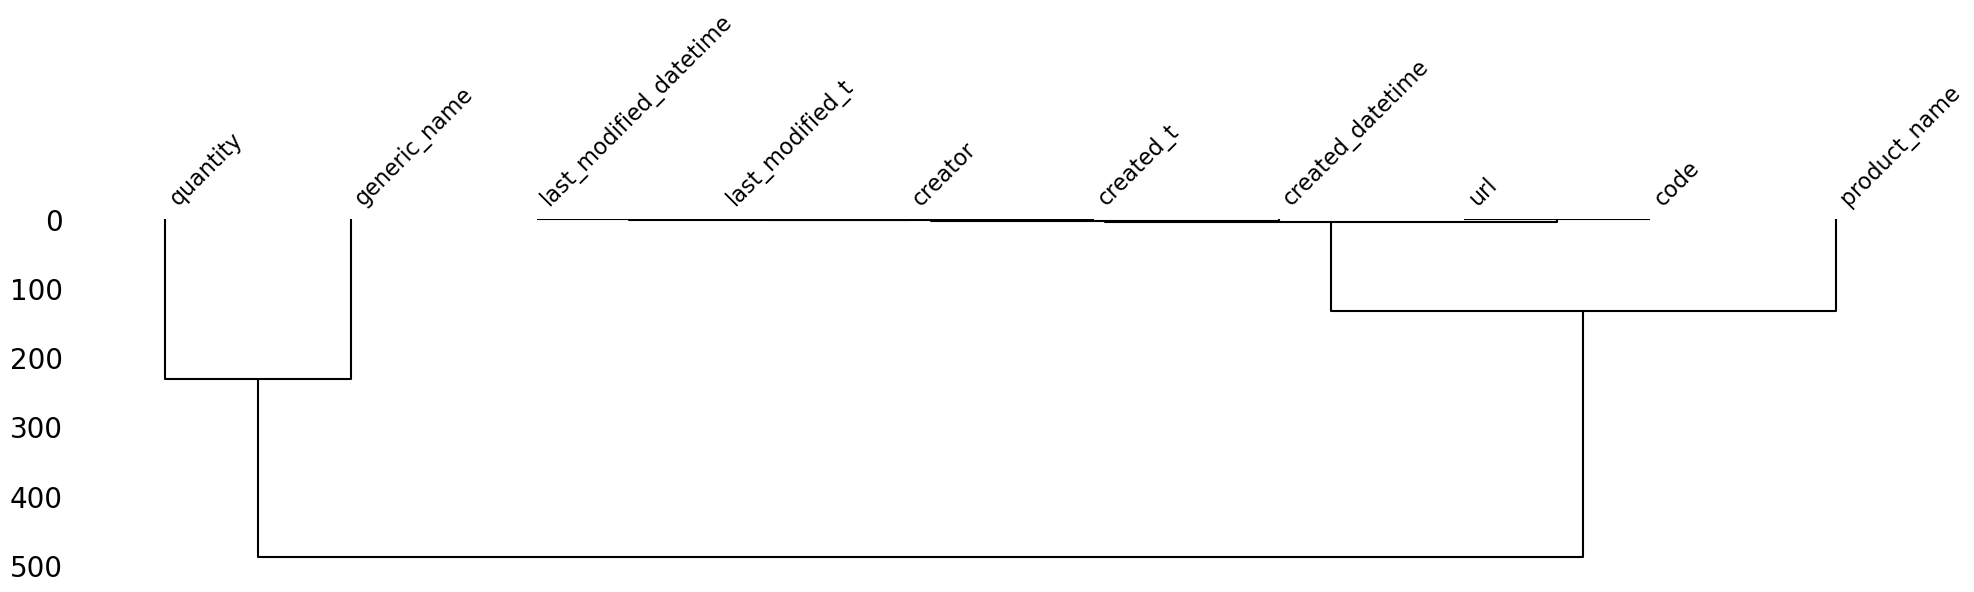

In [36]:
msno.dendrogram(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

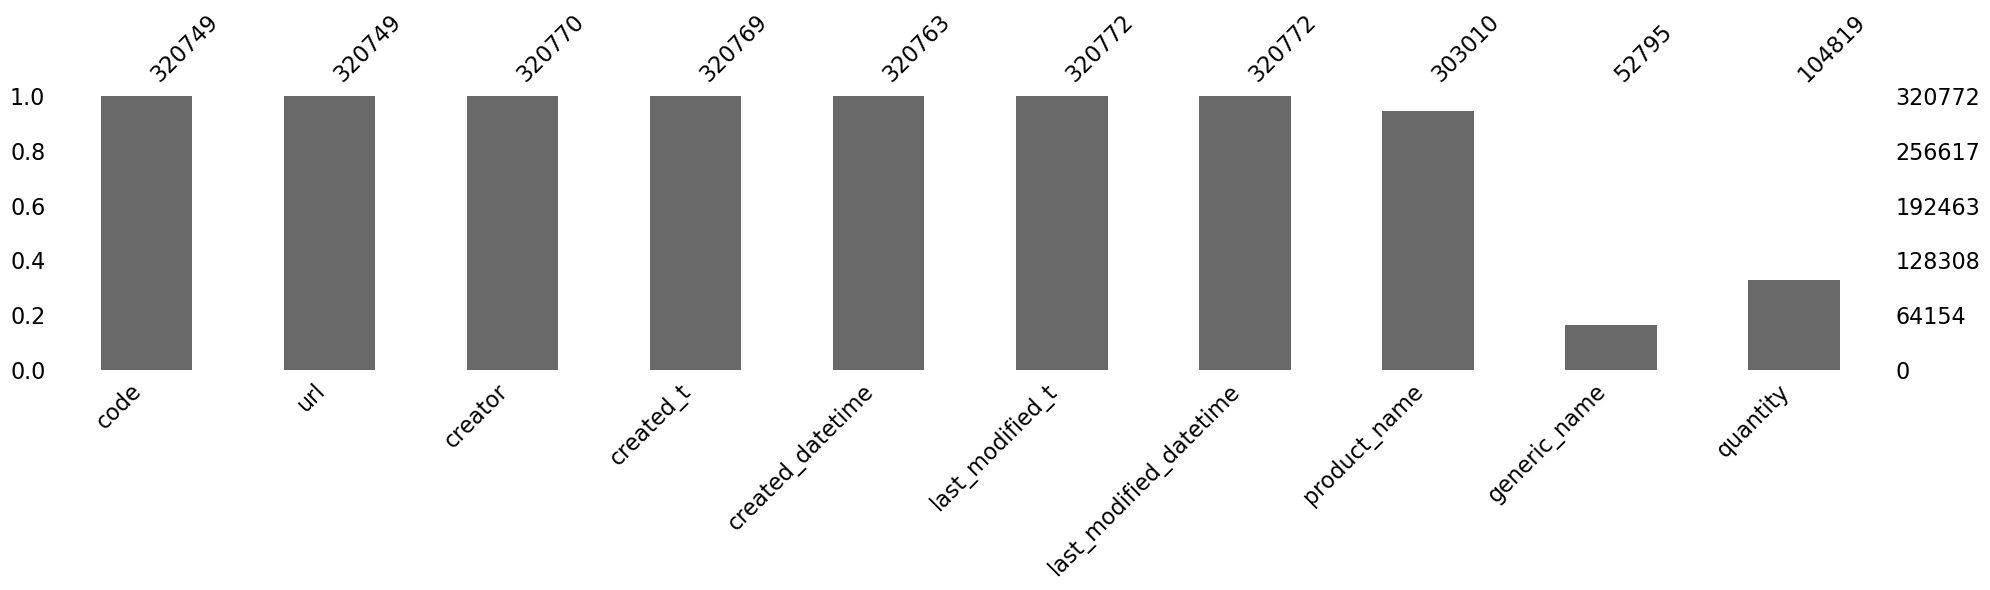

In [37]:
msno.bar(df_gen, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [47]:
df_tags.sample(10)

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr
132251,NaN,NaN,"Chocolove, Chocolove Xoxox","chocolove,chocolove-xoxox",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
71239,NaN,NaN,Pictsweet,pictsweet,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
276088,Sachet plastifié,sachet-plastifie,Wokmix,wokmix,Légumes frais,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Belgique,belgique,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgique,en:belgium,Belgique
155098,NaN,NaN,Quorn,quorn,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
182620,NaN,NaN,Almare Seafood,almare-seafood,"Fisch und Meeresfrüchte,Fisch,Räucherfisch,For...","en:seafood,en:fishes,en:smoked-fishes,en:trouts","Produits de la mer,Poissons,Poissons fumés,Tru...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deutschland,en:germany,Allemagne
212496,"Frais,Pot,Couvercle,Plastique","frais,pot,couvercle,plastique",Cora,cora,"Frais,Viandes,Charcuteries,Rillettes,Rillettes...","en:fresh-foods,en:meats,en:spreads,en:prepared...","Frais,Viandes,Produits à tartiner,Charcuteries...",NaN,NaN,Société des Rillettes Bahier (SDRB) - Route de...,...,FR 72.331.001 EC,fr-72-331-001-ec,"48.1,0.583333",NaN,sceaux-sur-huisne-sarthe-france,"Massy,France",Cora,France,en:france,France
68639,NaN,NaN,"Clearly Organic, Associated Wholesale Grocers...","clearly-organic,associated-wholesale-grocers-inc",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
171362,NaN,NaN,"Wellsley Farms, Bj's Wholesale Club / Corpora...","wellsley-farms,bj-s-wholesale-club-corporate-b...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
115745,NaN,NaN,Crystal Light,crystal-light,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
256589,"Papier,Aluminium","papier,aluminium",Kölln,kolln,Puffed oat,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deutschland,en:germany,Allemagne


In [60]:
valid_tags = df_tags['categories_tags'][~df_tags['categories_tags'].isna()]
valid_tags[valid_tags.str.startswith('en')]

174       en:plant-based-foods-and-beverages,en:plant-ba...
175       en:sugary-snacks,en:biscuits-and-cakes,en:past...
177       en:plant-based-foods-and-beverages,en:plant-ba...
180       en:sugary-snacks,en:biscuits-and-cakes,en:past...
182       en:plant-based-foods-and-beverages,en:plant-ba...
                                ...                        
320761    en:beverages,en:alcoholic-beverages,en:wines,e...
320763    en:plant-based-foods-and-beverages,en:beverage...
320765    en:meats,en:spreads,en:prepared-meats,en:salte...
320766    en:plant-based-foods-and-beverages,en:plant-ba...
320769    en:salty-snacks,en:appetizers,en:chips-and-fri...
Name: categories_tags, Length: 81220, dtype: object

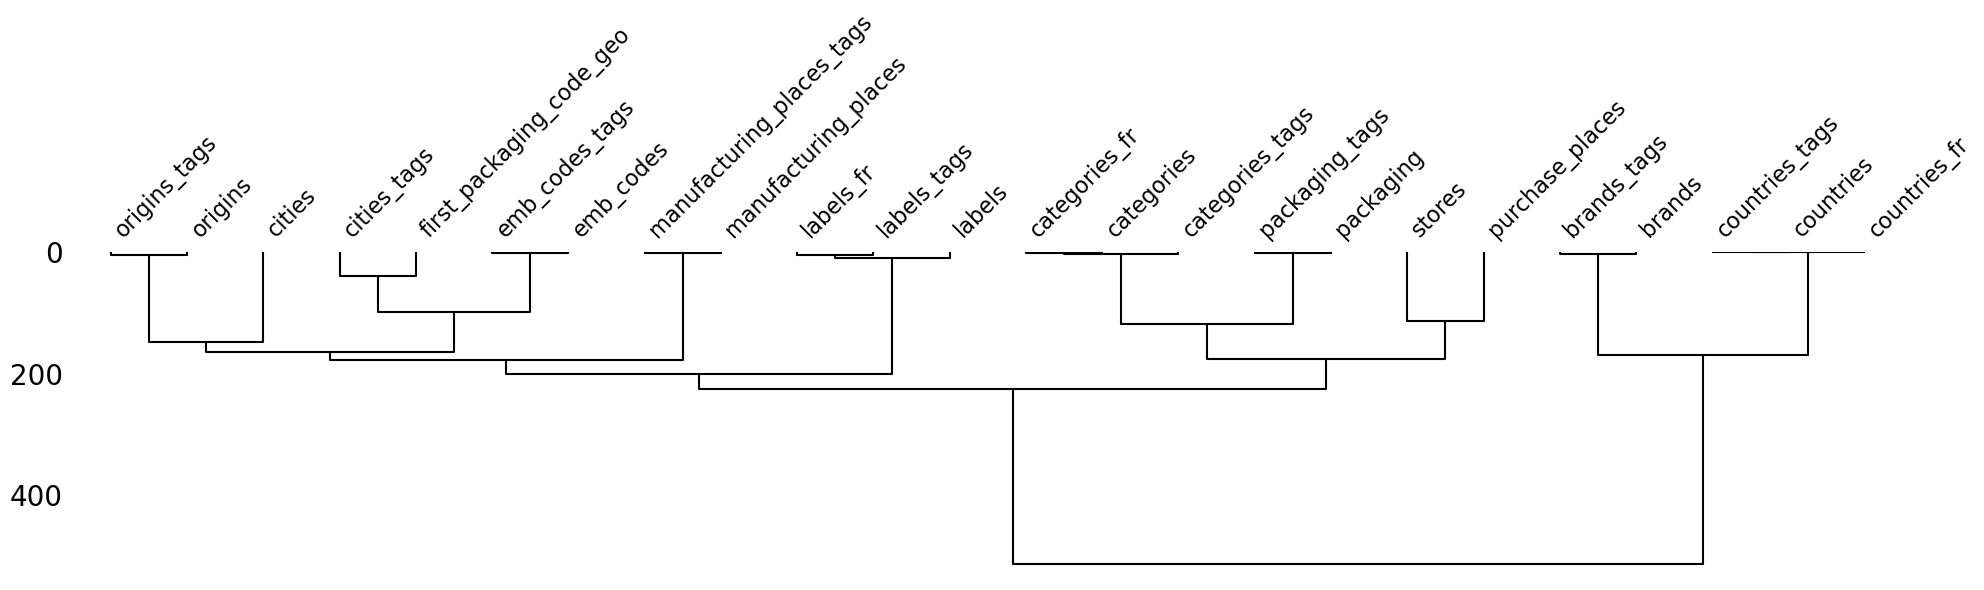

In [38]:
msno.dendrogram(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

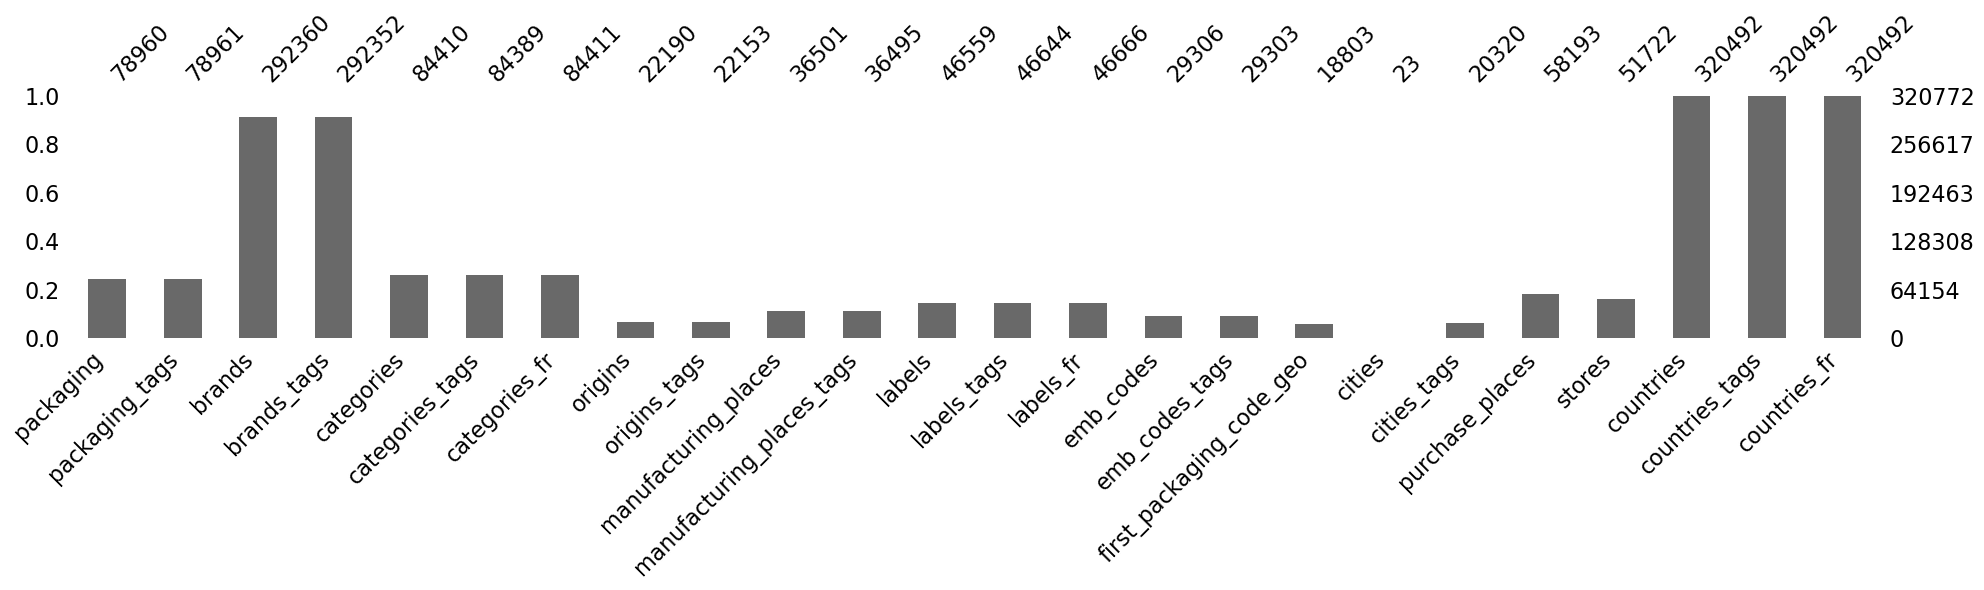

In [39]:
msno.bar(df_tags, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [49]:
df_ingredients.sample(10)

,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr
19112,"Fresh cucumbers, water, vinegar, salt, calcium...",NaN,NaN,NaN,NaN,NaN
252683,"Olives vertes (47,5 %) (olives vertes, sel, co...","anchois, anchois",NaN,NaN,NaN,NaN
96088,"Carbonated water, high fructose corn syrup, gr...",NaN,NaN,NaN,NaN,NaN
149524,"Cured with: water, contains 2% or less of the ...",NaN,NaN,NaN,NaN,NaN
191763,"Céréales (46,1%) [farine de froment (31%), cér...",NaN,NaN,"fruits à coque,soja,graines de sésame","en:nuts,en:sesame-seeds,en:soybeans","Fruits à coque,Graines de sésame,Soja"
119695,"Halkidiki green olives, water, pickled garlic,...",NaN,NaN,NaN,NaN,NaN
6239,"Pork, water, corn syrup and less than 2% of th...",NaN,NaN,NaN,NaN,NaN
150012,"Glucose syrup, sugar, water, gelatin, citric a...",NaN,NaN,NaN,NaN,NaN
293050,NaN,NaN,NaN,NaN,NaN,NaN
211086,NaN,NaN,NaN,NaN,NaN,NaN


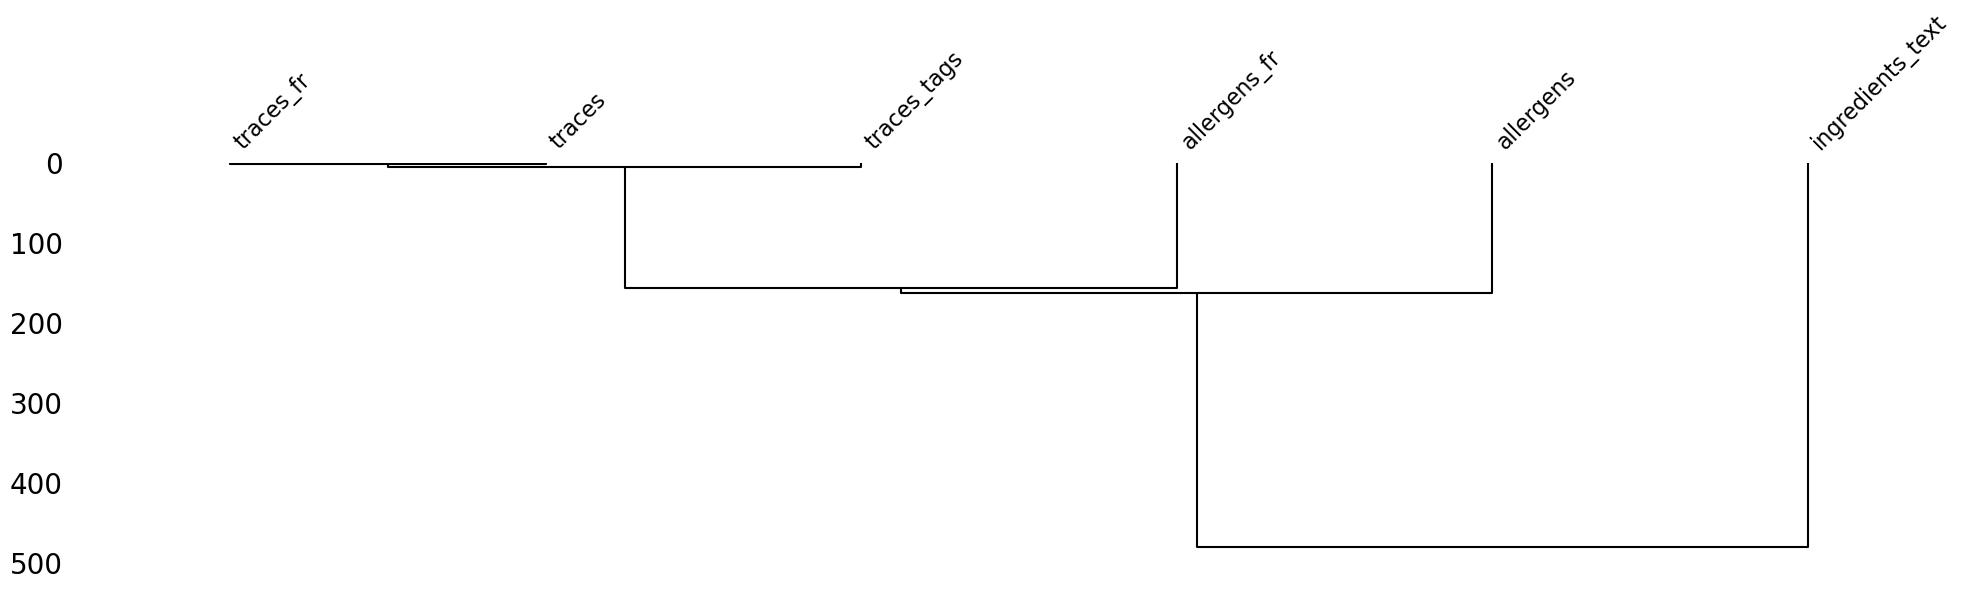

In [40]:
msno.dendrogram(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

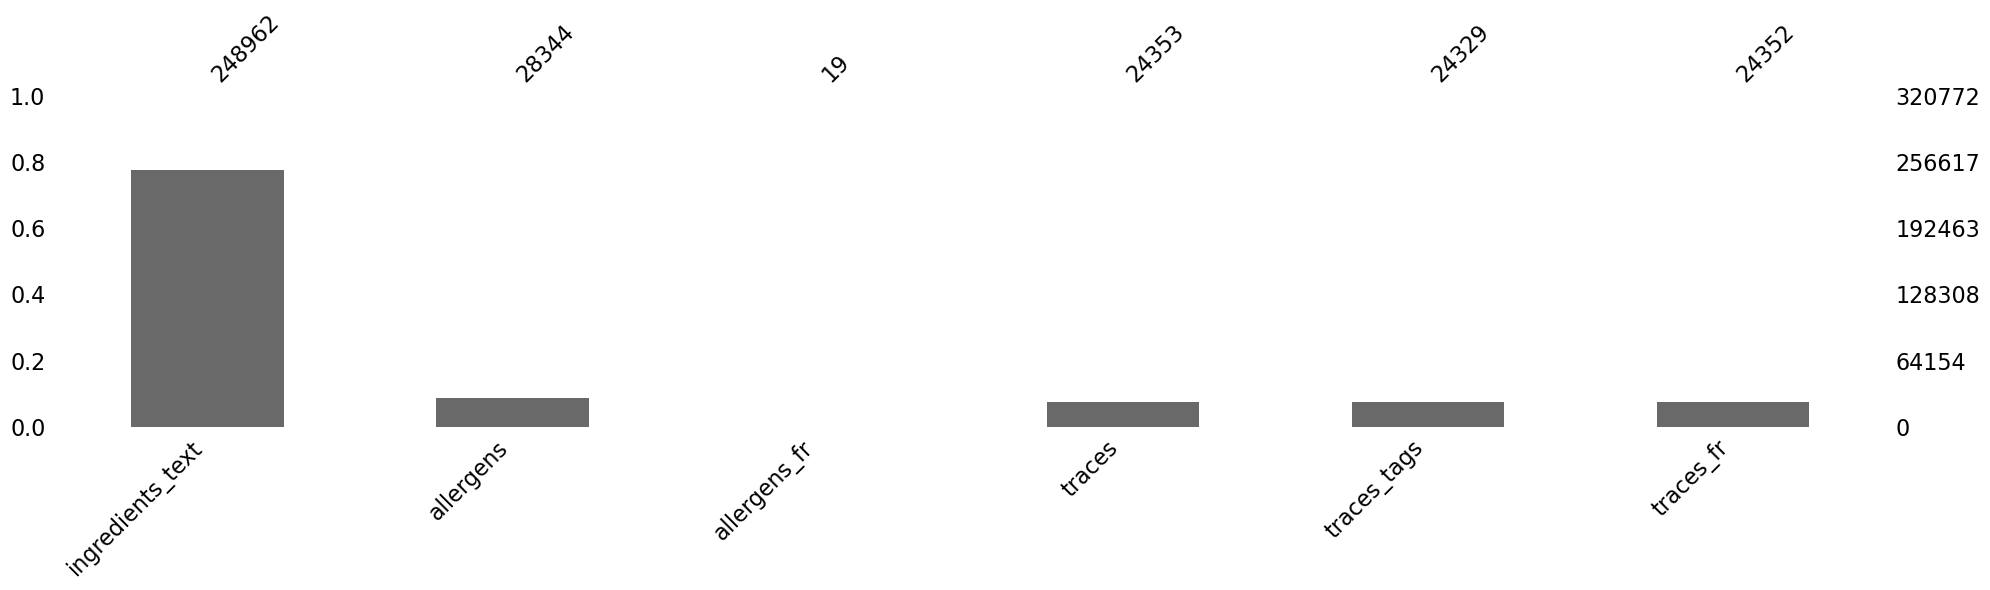

In [41]:
msno.bar(df_ingredients, figsize=(20, 6))
plt.tight_layout()
plt.show()

In [50]:
df_misc.sample(10)

,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
176296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Vide,A compléter,Informations nutritionnelles ...",NaN,NaN,NaN,NaN
87888,21 g (1 Tbsp),NaN,0.0,[ raw-and-unfiltered-honey -> en:raw-and-unfi...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
137841,30 g (30 g),NaN,0.0,[ popcorn-kernels -> en:popcorn-kernels ] [...,NaN,NaN,0.0,NaN,NaN,0.0,...,a,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
123925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/06...,http://fr.openfoodfacts.org/images/products/06...
193825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN
38187,125 g (0.5 cup),NaN,0.0,[ pears -> en:pears ] [ water -> en:water ...,NaN,NaN,0.0,NaN,NaN,0.0,...,a,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
266719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN
317965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN
210590,6 biscuits soit 44 grs,NaN,6.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e322,en:e330,en:e503,en:e500,en:e450,en:e304","E322 - Lécithines,E330 - Acide citrique,E503 -...",2.0,NaN,"huile-de-palme,e304-palmitate-d-ascorbyle",0.0,...,e,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...
317950,NaN,NaN,3.0,[ wasser -> de:wasser ] [ saccharose -> de:...,"en:e290,en:e375,en:e101","E290 - Dioxyde de carbone,E375 - Acide nicotin...",0.0,NaN,NaN,0.0,...,e,Beverages,Sweetened beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:beverages,Boissons,NaN,NaN


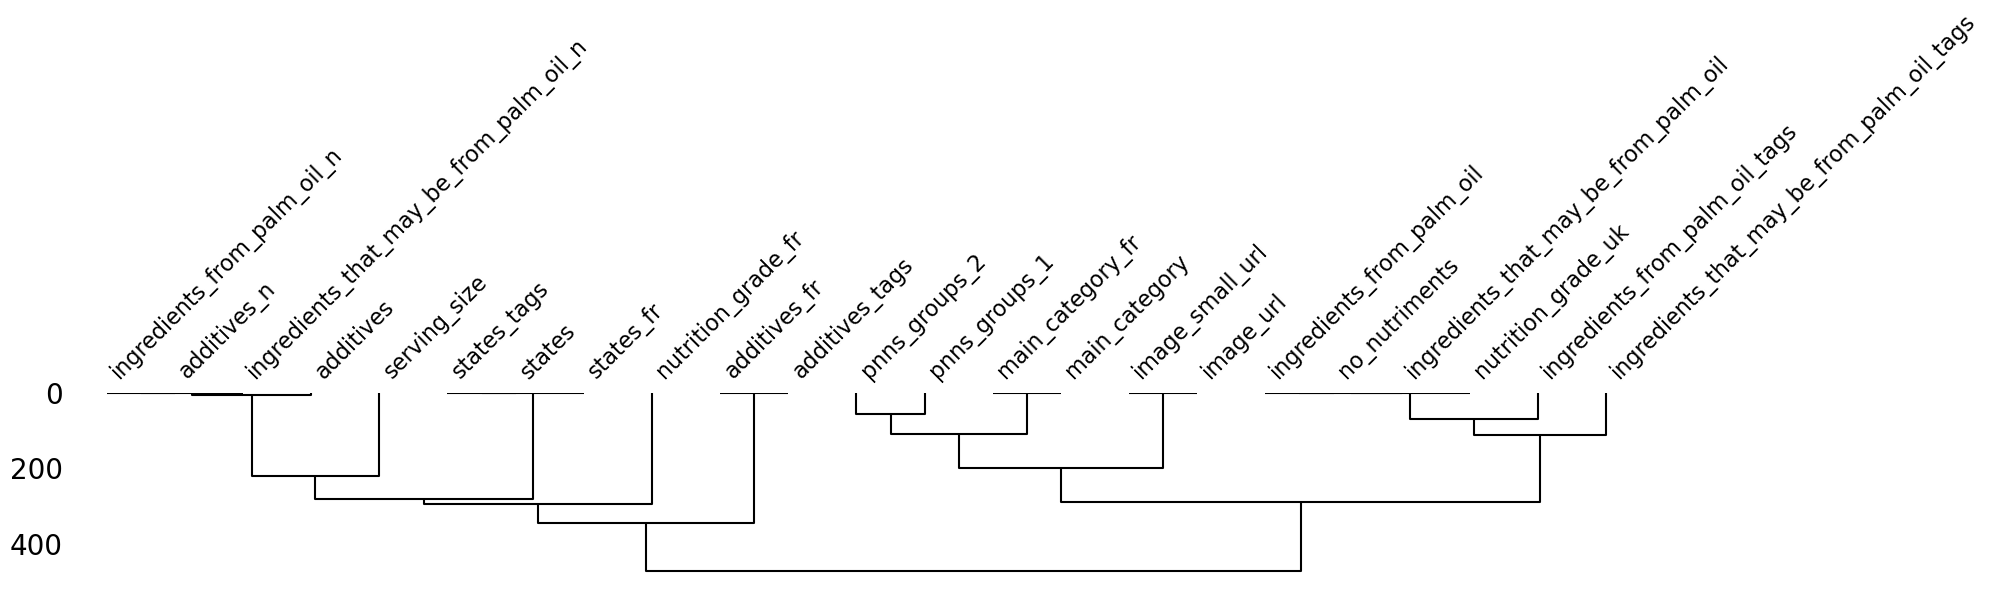

In [42]:
msno.dendrogram(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

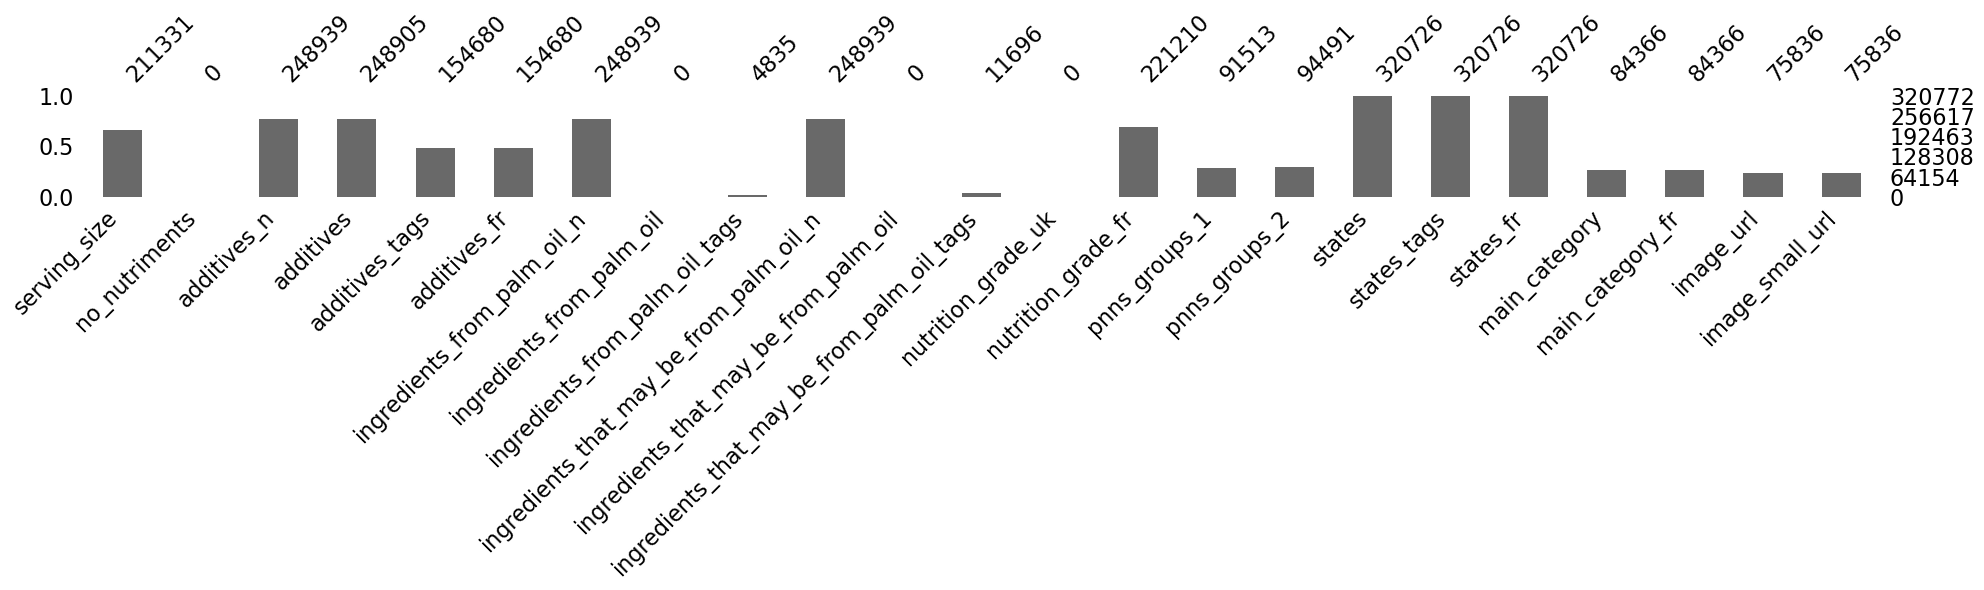

In [43]:
msno.bar(df_misc, figsize=(20, 6))
plt.tight_layout()
plt.show()

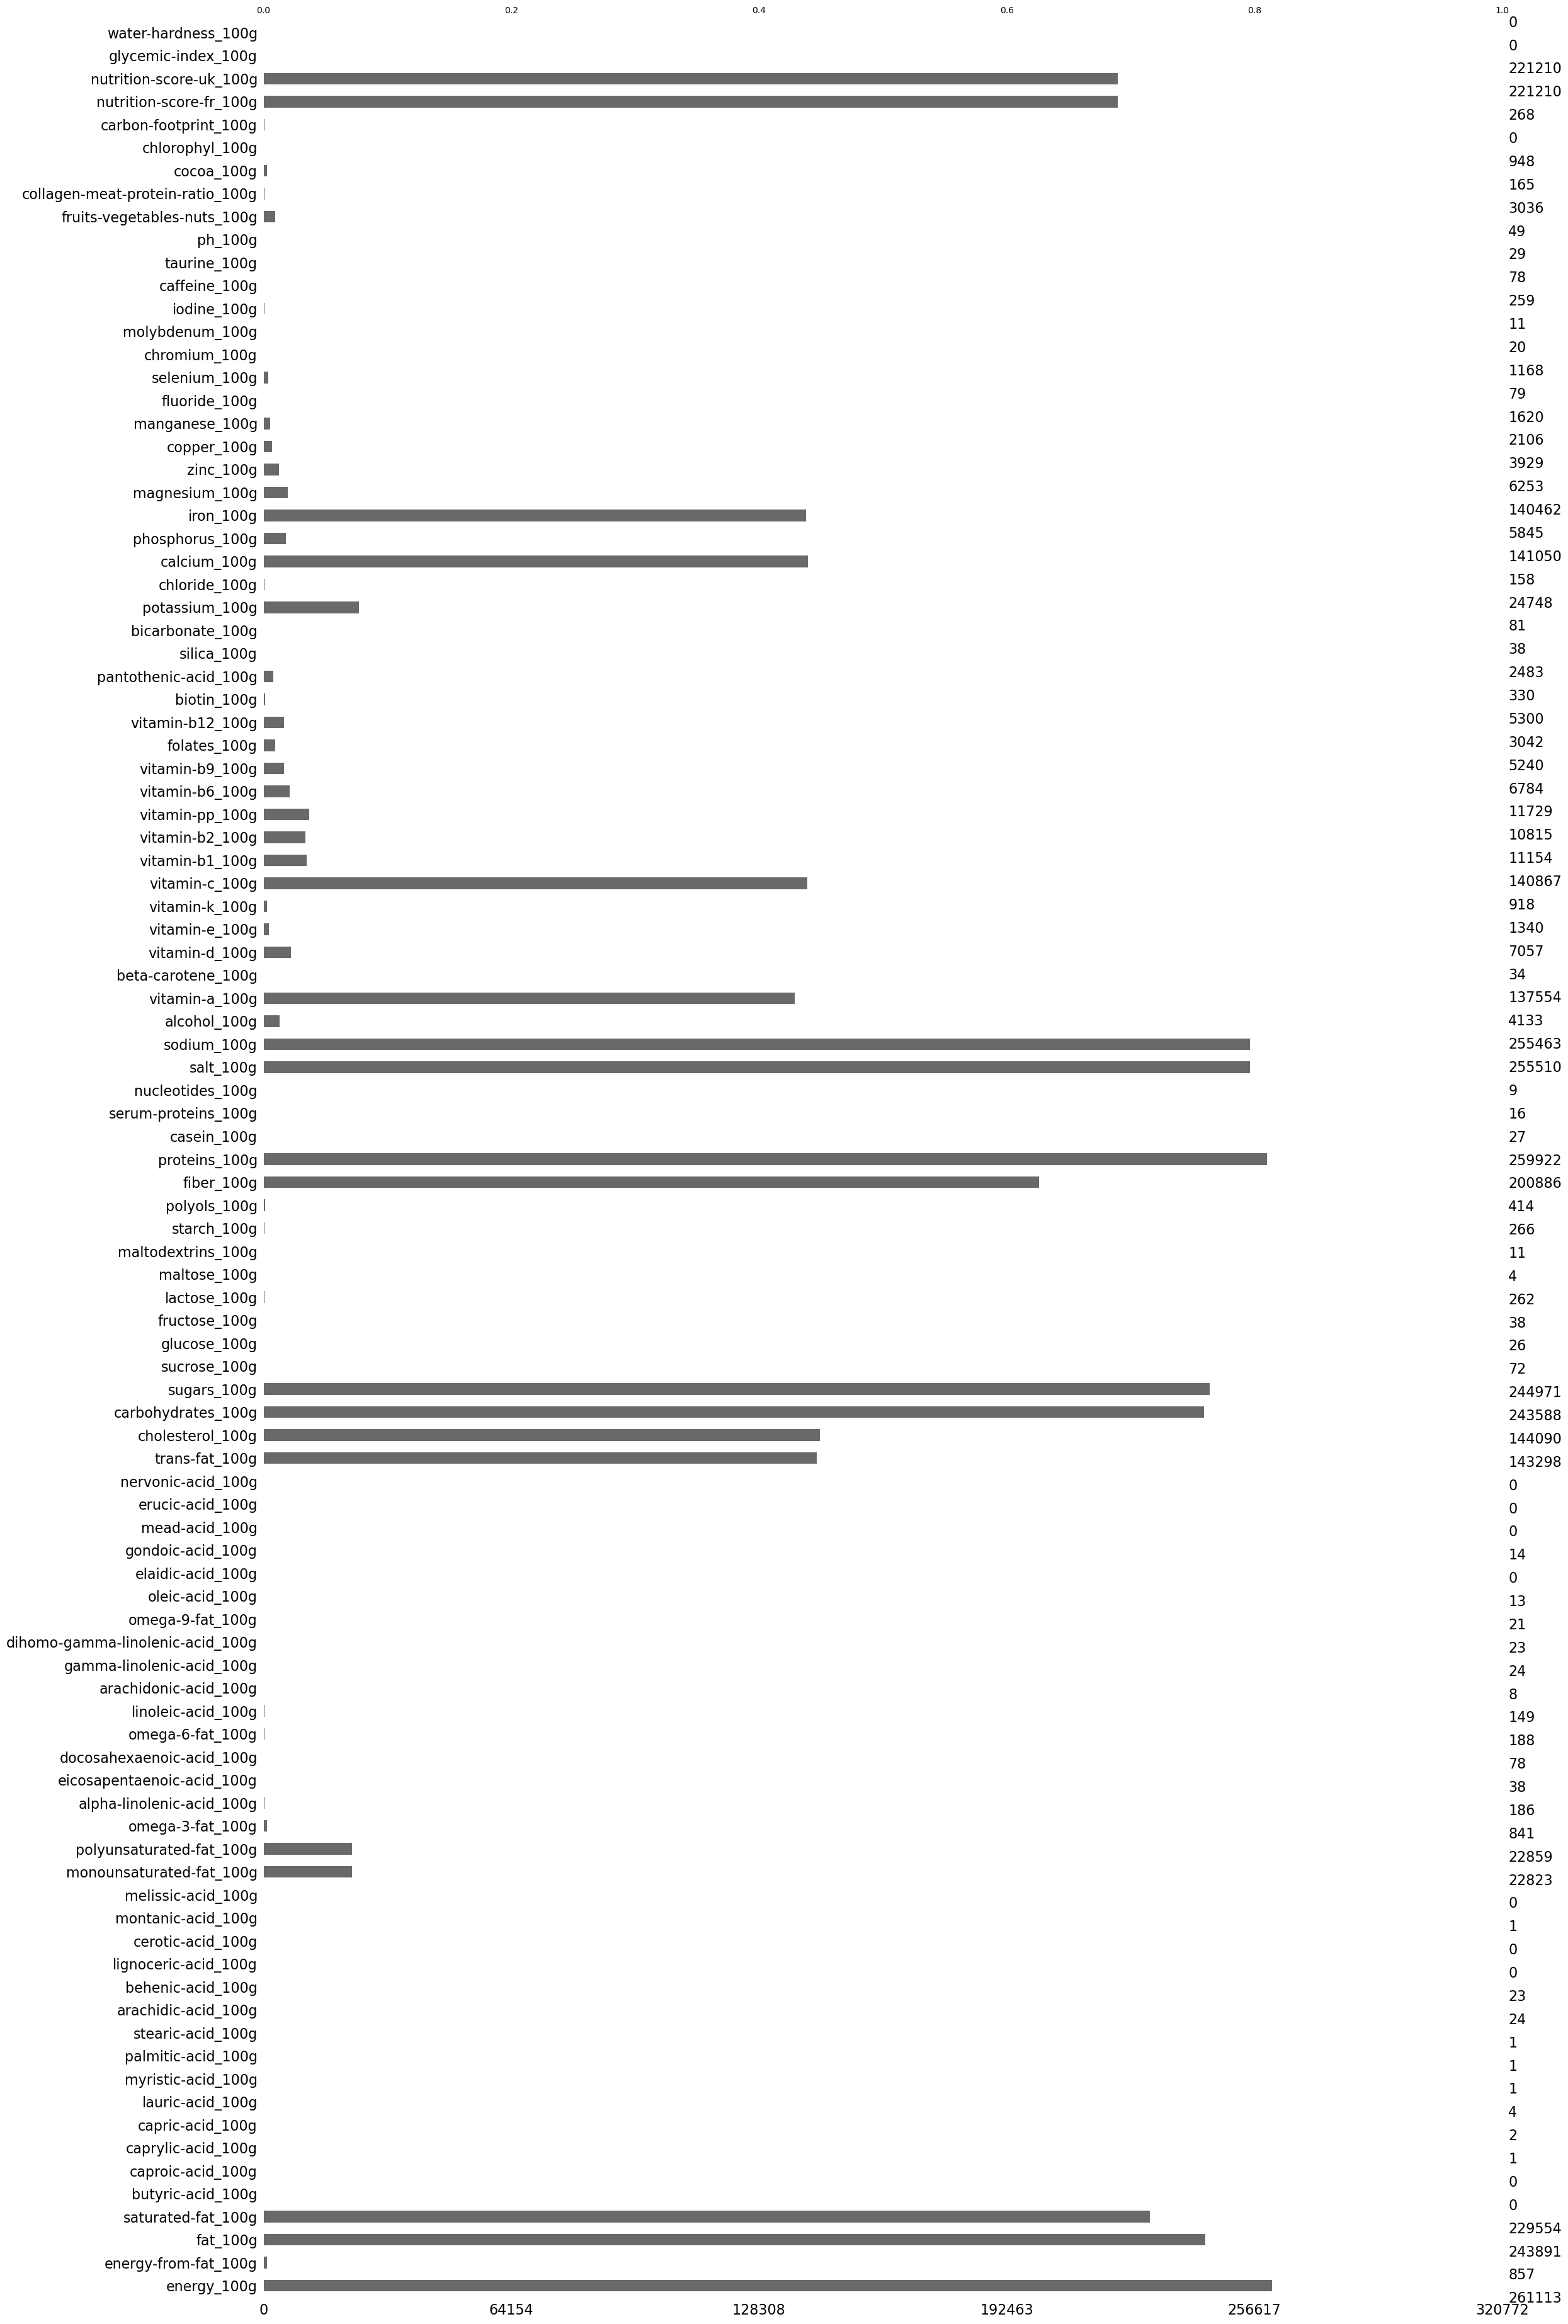

In [44]:
msno.bar(df_nutrition)
plt.tight_layout()
plt.show()